In [1]:
from weavepy import *

use_aliases = True

In [2]:
# Parameters
## Climate
climate_variable = "2m_temperature"
climate_variable_comparison = '<=' # '<', '<=', '>', or '>='
climate_variable_threshold = 5 # Number in units of variable
## Energy 
energy_variable = "solar_generation_capacity_factor"
energy_variable_comparison = '<' # '<', '<=', '>', or '>='
energy_variable_threshold = 0.05 # Number in units of variable
##Geography
country = "FR"

In [3]:
data = load_vars([climate_variable, energy_variable], future_models = ["cmcc_cm2_sr5", "mpi_esm1_2_hr", "ec_earth3"])
data

  0%|                                                     | 0/2 [00:00<?, ?it/s]

2m_temperature


/Users/bourdin/Softs/miniforge3/envs/weave/lib/python3.13/site-packages/xarray/structure/concat.py:540: UserWarning: No index created for dimension model because variable model is not a coordinate. To create an index for model, please first call `.set_coords('model')` on this object.
  ds.expand_dims(dim_name, create_index_for_new_dim=create_index_for_new_dim)
 50%|██████████████████████▌                      | 1/2 [00:05<00:05,  5.53s/it]

solar_generation_capacity_factor


/Users/bourdin/Softs/miniforge3/envs/weave/lib/python3.13/site-packages/xarray/structure/concat.py:540: UserWarning: No index created for dimension model because variable model is not a coordinate. To create an index for model, please first call `.set_coords('model')` on this object.
  ds.expand_dims(dim_name, create_index_for_new_dim=create_index_for_new_dim)
100%|█████████████████████████████████████████████| 2/2 [00:10<00:00,  5.12s/it]


<xarray.Dataset> Size: 54MB
Dimensions:                           (model: 4, Date: 753888)
Coordinates:
  * model                             (model) <U13 208B 'ERA5' ... 'ec_earth3'
  * Date                              (Date) datetime64[ns] 6MB 1980-01-01 .....
Data variables:
    2m_temperature                    (model, Date) float64 24MB 0.5372 ... 1...
    solar_generation_capacity_factor  (model, Date) float64 24MB 0.0 0.0 ... 0.0

In [19]:
data_daily = data.groupby("Date.date").mean()

In [25]:
# Identify problematic events
climate_days = identify_events(data_daily[climate_variable], climate_variable_comparison, climate_variable_threshold).rename("climate_event")
energy_days = identify_events(data_daily[energy_variable], energy_variable_comparison, energy_variable_threshold).rename("energy_event")
compound_days = (climate_days & energy_days).rename("compound_event")

In [33]:
# Identify events
climate_events, energy_events, compound_events = {}, {}, {}
for a in data.model.values:
    climate_events[a] = find_events(climate_days.sel(model = a).to_dataframe()["climate_event"])
    energy_events[a] = find_events(energy_days.sel(model = a).to_dataframe()["energy_event"])
    compound_events[a] = find_events(compound_days.sel(model = a).to_dataframe()["compound_event"])

In [82]:
# period length
period_len = {}
period_min_max = {}
for a in data.model.values:
    years = data.sel(model = a).where(~np.isnan(data.sel(model = a)), drop = True).Date.dt.year
    period_min_max[a] = years.min().values, years.max().values
    period_len[a] = (years.max() - years.min() + 1).values

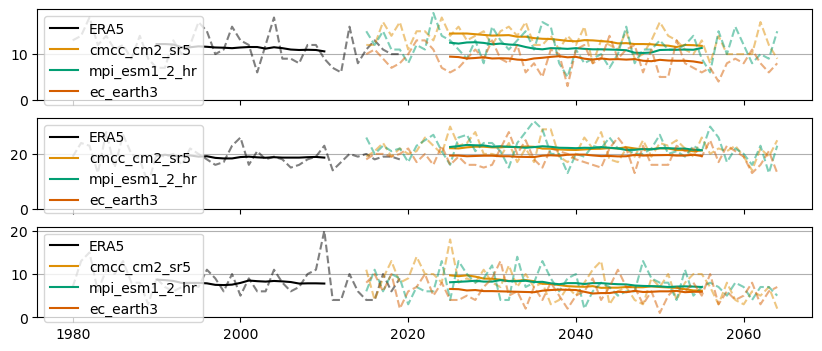

In [86]:
fig, axs = plt.subplots(3, figsize = [10, 4], sharex = True)
for i, d in enumerate([climate_events, energy_events, compound_events]):
    for j, a in enumerate(climate_events):
        N_events_per_year = pd.Series([e[0].year for e in d[a]]).value_counts().sort_index()
        N_events_per_year = pd.DataFrame(index = np.arange(*period_min_max[a])).join(N_events_per_year).fillna(0)
        N_events_per_year.plot(ax = axs[i], color = palette[a], linestyle = '--', alpha = 0.5, legend = False)
        N_events_per_year.rolling(20, center = True).mean().rename(columns={"count":a}).plot(ax = axs[i], color = palette[a], label = a)# legend = False,)
    axs[i].grid(axis = "y")
    axs[i].set_ylim(0)

Text(0.5, 1.0, 'Compound events')

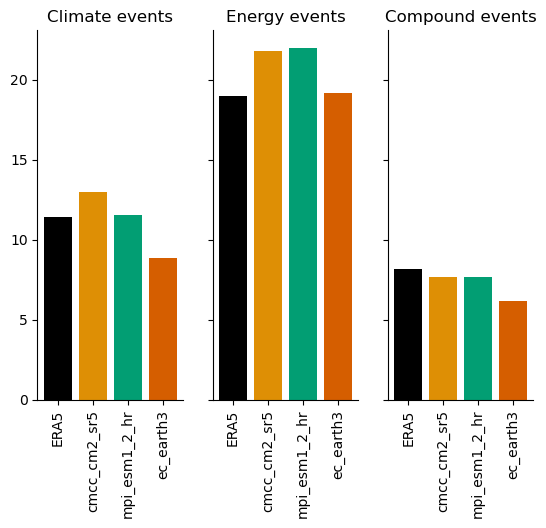

In [87]:
fig, axs = plt.subplots(1, 3, sharey = True)
nb_events_barplot(climate_events, period_len, axs[0], palette)
axs[0].set_title("Climate events")
nb_events_barplot(energy_events, period_len, axs[1], palette)
axs[1].set_title("Energy events")
nb_events_barplot(compound_events, period_len, axs[2], palette)
axs[2].set_title("Compound events")

(0.0, 15.0)

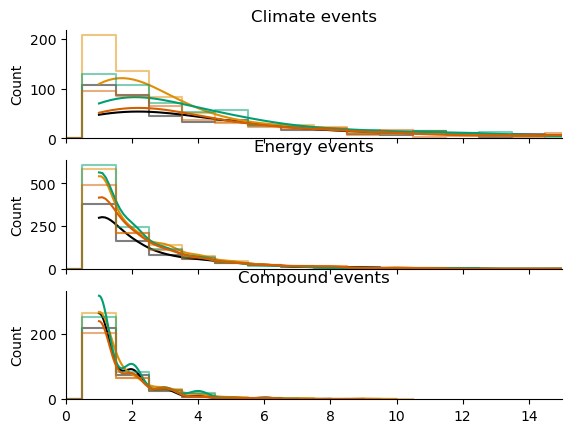

In [88]:
fig, axs = plt.subplots(3, sharex = True)
event_duration_histplot(climate_events, axs[0], palette, legend = False)
axs[0].set_title("Climate events")
event_duration_histplot(energy_events, axs[1], palette, legend = False)
axs[1].set_title("Energy events")
event_duration_histplot(compound_events, axs[2], palette, legend = False)
axs[2].set_title("Compound events")
axs[2].set_xlim(0,15)

AttributeError: 'datetime.date' object has no attribute 'dayofyear'

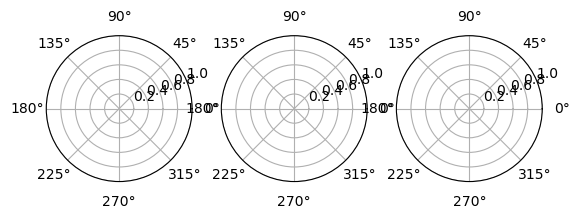

In [89]:
fig, axs = plt.subplots(1, 3, subplot_kw = dict(projection = "polar"))
event_seasonnality_histplot(climate_events, axs[0], palette, legend = False)
axs[0].set_title("Climate events")
event_seasonnality_histplot(energy_events, axs[1], palette, legend = False)
axs[1].set_title("Energy events")
event_seasonnality_histplot(compound_events, axs[2], palette, legend = False)
axs[2].set_title("Compound events")

In [90]:
climate_events

{np.str_('ERA5'): [[datetime.date(1980, 1, 1),
   datetime.date(1980, 1, 2),
   datetime.date(1980, 1, 3),
   datetime.date(1980, 1, 4),
   datetime.date(1980, 1, 5),
   datetime.date(1980, 1, 6),
   datetime.date(1980, 1, 7),
   datetime.date(1980, 1, 8),
   datetime.date(1980, 1, 9),
   datetime.date(1980, 1, 10),
   datetime.date(1980, 1, 11),
   datetime.date(1980, 1, 12),
   datetime.date(1980, 1, 13),
   datetime.date(1980, 1, 14),
   datetime.date(1980, 1, 15),
   datetime.date(1980, 1, 16),
   datetime.date(1980, 1, 17),
   datetime.date(1980, 1, 18),
   datetime.date(1980, 1, 19),
   datetime.date(1980, 1, 20),
   datetime.date(1980, 1, 21),
   datetime.date(1980, 1, 22),
   datetime.date(1980, 1, 23)],
  [datetime.date(1980, 1, 25),
   datetime.date(1980, 1, 26),
   datetime.date(1980, 1, 27),
   datetime.date(1980, 1, 28),
   datetime.date(1980, 1, 29)],
  [datetime.date(1980, 2, 11),
   datetime.date(1980, 2, 12),
   datetime.date(1980, 2, 13)],
  [datetime.date(1980, 2, 27